In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk
import threading
import statistics
import scipy.stats as stats

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('stopwords', quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('punkt', quiet=True)

True

## NLP function

In [7]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

In [8]:
def tokenization(input):
    assert(type(input) == list or type(input) == np.ndarray)

    processing_arm = [sub.split() for sub in input]
    extracted_tokens = []
    for elements in processing_arm:
        if type(elements) == list:
            for value in elements:
                extracted_tokens.append(value)

    release_stage = np.array(extracted_tokens)

    return release_stage


def stop_words_purge(stored_tokens):
    def remove_stopwords_from_text(tokens, stop_words_applied):
        assert (type(tokens) == list or type(tokens) == np.ndarray)
        if type(tokens) != np.ndarray:
            tokens = np.array(tokens)

        filtered_tokens = []
        for token in tokens:
            if token.lower() not in stop_words_applied:
                filtered_tokens.append(token)
        return filtered_tokens

    assert(type(stored_tokens) == list or type(stored_tokens) == np.ndarray)
    dev_mode = 0

    english_stop_words = set(stopwords.words("English"))
    spanish_stop_words = set(stopwords.words("Spanish"))
    if dev_mode == 1:
        print("<------------->")
        print("Purging of spanish and english stop words in progress...")
        print(f"English stop words(length: {len(english_stop_words)}): {english_stop_words}")
        print(f"Spanish stop words(length: {len(spanish_stop_words)}): {spanish_stop_words}")

    post_purge = []
    # streamlined version
    for tokens in stored_tokens:
        tokens_lower = [token.lower() for token in tokens]
        english_clearance = remove_stopwords_from_text(tokens_lower, english_stop_words)
        spanish_clearance = remove_stopwords_from_text(english_clearance, spanish_stop_words)
        post_purge.append(spanish_clearance)
    if dev_mode == 1:
        print("Purge of Spanish and english stop words completed...")
        print("<------------->")

    return post_purge


def replace_additional_dollar_signs(text):
    assert(type(text) == str)
    parts = text.split('$', 1)

    if len(parts) > 1:
        # If there was at least one '$', replace the rest and reconstruct the string
        parts[1] = re.sub(r"\$", "", parts[1])
        return '$'.join(parts)
    else:
        return text


def dataframe_generator(description_column, results_column, c1, c2, column_name, developer_mode):
    def data_cataloging(mutation_col_1, mutation_col_2, data_logging_01, data_logging_02):
        assert(type(mutation_col_1) == str and type(mutation_col_2) == str)
        assert(type(data_logging_01) == list or type(data_logging_01) == np.ndarray)
        assert(type(data_logging_01) == list or type(data_logging_02) == np.ndarray)

        dataframe = pd.DataFrame({
            mutation_col_1: data_logging_01,
            mutation_col_2: data_logging_02
        })
        return dataframe

    assert(type(description_column) == list or type(description_column) == np.ndarray)
    assert(type(results_column) == list or type(results_column) == np.ndarray)
    assert(type(c1) == str)
    assert(type(c2) == str)
    assert(type(column_name) == str)
    assert(type(developer_mode) == int)
    assert(len(description_column) == len(results_column))

    dataframe_desription = description_column
    dataframe_specifics = results_column

    dataframe = data_cataloging(c1, c2, dataframe_desription, dataframe_specifics)
    file_name = f"{column_name.capitalize()} data analysis results.csv"

    #saving it as a csv.
    #-------------------
    dataframe.to_csv(file_name, index=True)
    # -------------------
    if developer_mode == 1:
        print(f"File name: {file_name}")


def enhanced_diagnostics(column_name, input_data, developer_mode):
    assert (type(column_name) == str)
    assert (type(input_data) == list or type(input_data) == np.ndarray)
    assert (type(developer_mode) == int)
    if type(input_data) != np.ndarray:
        input_data = np.array(input_data)

    zeros = 0
    positives = 0
    negatives = 0
    for values in input_data:
        if values == 0:
            zeros += 1
        elif values > 0:
            positives += 1
        elif values < 0:
            negatives += 1
    percentage_of_unique = (len(set(input_data)) / len(input_data))*100

    updated_name = column_name + " enhanced diagnostics"
    description = ["Number of unique values", "Percentage of unique values", "Zeros", "Negatives", "Positives", "Total number of raw input values"]
    outputs = [len(set(input_data)), f"{percentage_of_unique}%", zeros, negatives, positives, len(input_data)]
    dataframe_generator(description,outputs, "Analysis metric", "Result",updated_name.upper(),developer_mode)

    if developer_mode == 1:
        if len(description) == len(outputs):
            for element_A175 in range(len(description)):
                print(f"{description[element_A175]}: {outputs[element_A175]}")


def numeric_analysis_arm(column_name, input_data, developer_mode):
    assert(type(column_name) == str)
    assert(type(input_data) == list or type(input_data) == np.ndarray)
    assert(type(developer_mode) == int)
    if type(input_data) != np.ndarray:
        input_data = np.array(input_data)

    analysis_description = ["Maximum", "Minimum", "Mean", "Median", "Mode", "Standard deviation", "Range", "Skew", "Kurtosis", "Variance"]
    analysis_results = [round(np.max(input_data), 4), round(np.min(input_data), 4), round(np.mean(input_data), 4), round(np.median(input_data), 4),
                        round(statistics.mode(input_data), 4), round(np.std(input_data), 4), round(np.max(input_data) - np.min(input_data), 4),
                        stats.skew(input_data),round(stats.kurtosis(input_data),4), round(statistics.variance(input_data),4)]
    if developer_mode == 1:
        for analysis_outputs in range(len(analysis_results)):
            print(f"{analysis_description[analysis_outputs]}: {analysis_results[analysis_outputs]}")

    dataframe_generator(analysis_description,analysis_results,"Analysis metric", "Result",column_name.upper(), developer_mode)


def remove_emojis(text):
    assert(type(text))
    # Regex pattern to match all emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def link_mention_purge(text):
    assert(type(text) == str)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove Mentions
    text = re.sub(r'@\w+', '', text)
    # Remove everything except letters and necessary whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text


def inpurity_purging_protocol(input_storage):
    assert(type(input_storage) == list or type(input_storage) == np.ndarray)
    if type(input_storage) != np.ndarray:
        input_storage = np.array(input_storage)
    cleared = []
    for element in input_storage:
        text_no_urls = link_mention_purge(element)
        baseline = remove_emojis(text_no_urls).replace("(","").replace(")","").strip('"')
        updated_baseline = re.sub(r"(\w)([,.!?;:()-])", r"\1 \2", baseline)
        purged_S01 = updated_baseline.replace("..", "")
        purged_S02 = purged_S01.replace('"',"")
        purged_S03 = purged_S02.replace(";)","")
        purged_S04 = purged_S03.replace("*", "")
        purged_S05 = re.sub(r"@\w+", " ", purged_S04)
        purged_S06 = purged_S05.replace("  "," ")
        purged_S07 = purged_S06.replace("!!", "!")
        purged_S08 = purged_S07.replace("!!!", "!")
        purged_S09 = replace_additional_dollar_signs(purged_S08)
        purged_S10 = purged_S09.replace(",,","")
        purged_S11 = purged_S10.replace("=(","")
        purged_S12 = purged_S11.replace("=>","")
        purged_S13 = purged_S12.replace(" .", "")
        purged_S14 = purged_S13.replace("!","")
        cleared.append(purged_S14)

    cleared_numpy_conversion = np.array(cleared)

    return cleared_numpy_conversion


def remove_stopwords_from_text(tokens, stop_words_applied):
    assert(type(tokens) == list or type(tokens) == np.ndarray)
    if type(tokens) != np.ndarray:
        tokens = np.array(tokens)

    filtered_tokens = []
    for token in tokens:
        if token.lower() not in stop_words_applied:
            filtered_tokens.append(token)
    return filtered_tokens

## EDA

In [16]:
DATA_PATH = "./data/raw_tweets.csv"

In [17]:
df = pd.read_csv(DATA_PATH)
df.head()

,Description,Analysis results,Description Translated,Description Cleaned Translated
0,@liznorthon @SoyAIvaro @ursulaeggers @MielyMer...,1,@liznorthon @SoyAIvaro @ursulaeggers @MielyMer...,"They caught the suspect, he is a Colombian nat..."
1,@ccarvajaly Cuando se den cuenta que eran homi...,1,@ccarvajaly When they realize that they were m...,When they realize that they were murderers or ...
2,@SergioChouza @santidemoreno11 Jajaajja ahí es...,1,@SergioChouza @santidemoreno11 Hahaha you were...,"Hahaha, you were good there, you can see YOUR ..."
3,"Acá podemos ver a un alemán, de cabello rubio,...",1,"Here we can see a German, with blonde hair, bl...","Here we can see a German, with blonde hair, bl..."
4,@Senado_Chile Murieron 8 compatriotas por culp...,1,@Senado_Chile 8 compatriots died because of an...,8 compatriots died because of an immigrant who...


In [18]:
missing_values = df.isnull().sum()
label_dist = df['Analysis results'].value_counts(normalize=True)

print("Missing Values:\n", missing_values)
print("Label Distribution:\n", label_dist)

Missing Values:
 Description                       0
Analysis results                  0
Description Translated            0
Description Cleaned Translated    0
dtype: int64
Label Distribution:
 Analysis results
0    0.5135
1    0.4865
Name: proportion, dtype: float64


In [29]:
nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))

def calculate_word_frequencies(texts):
    words = []
    
    for text in texts:
        tokens = word_tokenize(text)
        filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
        words.extend(filtered_tokens)

    return Counter(words)

frequencies = calculate_word_frequencies(df['Description Cleaned Translated'])
print("most frequest tokens:")
frequencies.most_common(10)

most frequest tokens:


[('immigrant', 962),
 ('boat', 285),
 ('country', 223),
 ('menas', 206),
 ('black', 197),
 ('immigrants', 193),
 ('like', 189),
 ('people', 185),
 ('fucking', 162),
 ('one', 162)]

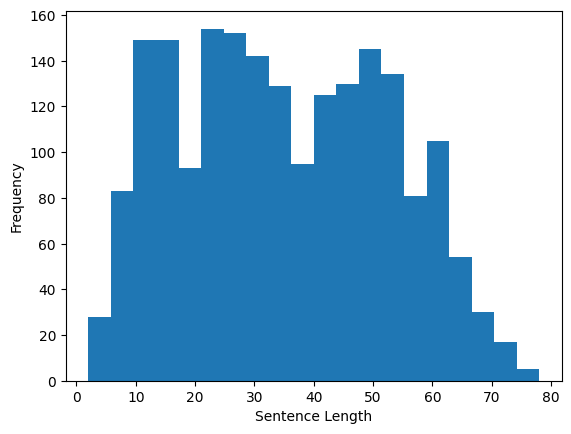

In [24]:
sentence_length = [len(word_tokenize(sentence)) for sentence in df['Description Cleaned Translated']]

plt.hist(sentence_length, bins=20)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [26]:
purification_analysis_deploy = 1

In [28]:
if purification_analysis_deploy == 1:
    # Uses the english translations of the tweets
    file_path = DATA_PATH
    source_data = pd.read_csv(file_path)
    developer_mode = 1
    loop_viewer = 0

    print("<------------------>")
    column_names = list(source_data.columns)
    column_data_types_detected = []
    object_data_columns = []
    analysis_compatible_columns = []

    for c_names in column_names:
        column_data = source_data[c_names].to_numpy()
        types_detected = column_data.dtype
        column_data_types_detected.append(types_detected)
        if types_detected == "int64":
            analysis_compatible_columns.append(c_names)
        elif types_detected == "object":
            object_data_columns.append(c_names)

    if developer_mode == 1:
        if len(column_names) == len(column_data_types_detected):
            for element in range(len(column_names)):
                print(f"Column name: {column_names[element]} | Data type detected: {column_data_types_detected[element]}")
    elif developer_mode == 0:
        print("Developer mode inactive")
    print("<------------------>")

    text_isolation = source_data["Description Cleaned Translated"].to_numpy()
    text_isolation = inpurity_purging_protocol(text_isolation)
    unique_locations = []
    for tweets in text_isolation:
        if tweets not in unique_locations:
            unique_locations.append(tweets)

    target_isolation = source_data["Analysis results"].to_numpy()
    numbers_detected = []
    for numbers in target_isolation:
        if numbers not in numbers_detected:
            numbers_detected.append(numbers)
        elif numbers in numbers_detected:
            continue

    if len(target_isolation) == len(text_isolation):
        print(f"Target isolated data: {len(target_isolation)}")
        print(f"Text isolated data: {len(text_isolation)}")

    zero = 0
    one = 0
    asociation_text = []
    asociation_target = []
    if len(target_isolation) == len(text_isolation):
        for elements in range(len(target_isolation)):
            asociation_text.append(text_isolation[elements])
            asociation_target.append(target_isolation[elements])
            if target_isolation[elements] == 0:
                zero += 1
            elif target_isolation[elements] == 1:
                one += 1

    full_set = one + zero
    if developer_mode == 1:
        print(f"Flagged: {one}")
        print(f"Cleared: {zero}")
        print(f"Full set: {full_set}")

    if full_set != 0:
        zero_percentage = (zero / full_set) * 100
        one_percentage = (one / full_set) * 100
    else:
        zero_percentage = "Infinity"
        one_percentage = "Infinity"

    if one > zero:
        description = ["Cleared", "Flagged", "Percentage ratio of Cleared", "Percentage ratio of Flagged"]
        results = [zero, one, f"{round(zero_percentage, 2)} %", f"{round(one_percentage, 2)} %"]
    else:
        description = ["Cleared", "Flagged", "Percentage ratio of flagged", "Percentage ratio of Cleared"]
        results = [zero, one, f"{round(one_percentage, 2)} %", f"{round(zero_percentage, 2)} %"]

    # Token analysis with stop words purge integrated
    text_isolation = text_isolation.flatten()
    tokenized_conversion = tokenization(text_isolation)

    # Emoji removal in classic for-loop format
    post_purge_storage = []
    for pre_purge in tokenized_conversion:
        post_purge = remove_emojis(pre_purge)
        post_purge_storage.append(post_purge)

    # Calculate unique tokens after stop words removal
    unique_tokens, counts = np.unique(post_purge_storage, return_counts=True)

    max_value = max(counts)
    index_coordinates = 0
    for values in range(len(counts)):
        if counts[values] == max_value:
            index_coordinates = values
            break

    # Out of the box random analysis
    print(f"Max value: {max_value}")
    print(f"Index coordinate of max value: {index_coordinates}")
    print(f"Token at corresponding coordinate: {post_purge_storage[index_coordinates]}")

    # Zips everything into a dictionary
    token_counts = dict(zip(unique_tokens, counts))

    # Prepare for dataframe generation
    token_keys = list(token_counts.keys())
    token_values = list(token_counts.values())
    token_des_column = ["Unique tokens", "Total tokens", "Percentage of unique tokens"]
    token_res_column = [len(unique_tokens), sum(counts), f"{(len(unique_tokens) / sum(counts) * 100)} %"]

    # Enable this multithread deployment to get the csv files
    # I disabled it because its not required anymore
    multithreading_deployment = 0
    if multithreading_deployment == 1:
        if __name__ == "__main__":
            t1 = threading.Thread(target=dataframe_generator(asociation_text, asociation_target, c1="Cleaned tweet", c2="Tags", column_name="Purification verification", developer_mode=developer_mode))
            t2 = threading.Thread(target=dataframe_generator(description, results, c1="Cleared/Flagged quantity", c2="Analysis output", column_name="Tags analysis", developer_mode=developer_mode))
            t3 = threading.Thread(target=dataframe_generator(token_des_column, token_res_column, c1="Token details", c2="Token count", column_name="Token analysis", developer_mode=developer_mode))
            t4 = threading.Thread(target=dataframe_generator(token_keys, token_values, c1="Individual words", c2="Occurrences", column_name="Frequency of token usage", developer_mode=developer_mode))

            threads = [t1, t2, t3, t4]
            for individual_threads in threads:
                individual_threads.start()
            for initiated_threads in threads:
                initiated_threads.join()

<------------------>
Column name: Description | Data type detected: object
Column name: Analysis results | Data type detected: int64
Column name: Description Translated | Data type detected: object
Column name: Description Cleaned Translated | Data type detected: object
<------------------>
Target isolated data: 2000
Text isolated data: 2000
Flagged: 973
Cleared: 1027
Full set: 2000
Max value: 2685
Index coordinate of max value: 7020
Token at corresponding coordinate: GIRL
